<a href="https://colab.research.google.com/github/Claudia060392/Portafolio-Ciencia-de-Datos/blob/main/Practicas%20Consolidadas/Modulo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media (Tutoría): 85.87
Media (Control): 75.07
Desv.Est. (Tutoría): 4.02
Desv.Est. (Control): 3.71


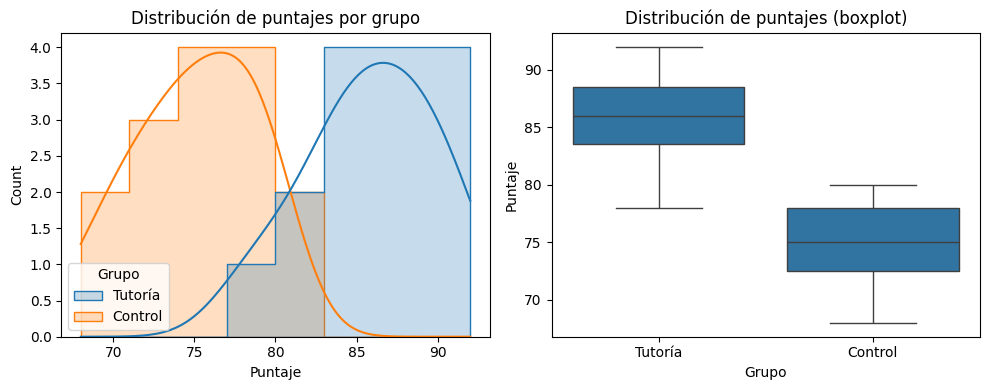


Prueba t (Welch)
t observado: 7.6489
p-valor (bilateral): 2.582178995326276e-08
p-valor (unilateral, H1: Tutoría > Control): 1.291089497663138e-08
Conclusión: con α=0.05, se rechaza H0; la tutoría muestra mejor rendimiento.

IC 95% para (media_Tutoría - media_Control):
Diferencia puntual: 10.800
IC95%: [7.907, 13.693]
Interpretación: el IC queda completamente sobre 0; la tutoría supera al control en promedio.


In [3]:
# Practica de Consolidacion – Módulo 5
# Diseño y análisis de un experimento sobre rendimiento académico

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# ---------------------------------------------
# Datos de la consigna (Grupo A: tutoría, Grupo B: control)
# ---------------------------------------------
# Puntajes en arreglos numpy
grupo_a = np.array([85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88])
grupo_b = np.array([70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80])

# DataFrame para luego graficar/mostrar con seaborn
df = pd.DataFrame({
    "Puntaje": np.concatenate([grupo_a, grupo_b]),
    "Grupo": (["Tutoría"] * len(grupo_a)) + (["Control"] * len(grupo_b))
})

# ---------------------------------------------
# 2) Estadísticas descriptivas
# ---------------------------------------------
# Cálculo de medias y desviaciones estándar (método de muestra: ddof=1)
media_a = grupo_a.mean()
media_b = grupo_b.mean()
std_a = grupo_a.std(ddof=1)
std_b = grupo_b.std(ddof=1)

print("Media (Tutoría):", round(media_a, 2))
print("Media (Control):", round(media_b, 2))
print("Desv.Est. (Tutoría):", round(std_a, 2))
print("Desv.Est. (Control):", round(std_b, 2))

# Histogramas lado a lado para ver la distribución de puntajes por grupo
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

sns.histplot(data=df, x="Puntaje", hue="Grupo", kde=True, bins=8, element="step")
plt.title("Distribución de puntajes por grupo")
plt.xlabel("Puntaje")

# Diseño de un boxplot para observar la mediana y posibles valores extremos
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Grupo", y="Puntaje")
plt.title("Distribución de puntajes (boxplot)")
plt.xlabel("Grupo")
plt.ylabel("Puntaje")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 3) Prueba de hipótesis (alfa = 0.05)
#    H0: media_A = media_B
#    H1: media_A > media_B  (tutoría mejora rendimiento)
# ---------------------------------------------
# Uso t de Welch por simplicidad (no asumo varianzas iguales)
t_stat, p_bilateral = stats.ttest_ind(grupo_a, grupo_b, equal_var=False)

# Para una hipótesis direccional (A > B), ajusto el p-valor:
# si la diferencia observada es en la dirección de H1 (media_A > media_B),
# el p-valor unilateral es p_bilateral/2; si no, tomo 1 - p_bilateral/2
if media_a > media_b:
    p_unilateral = p_bilateral / 2
else:
    p_unilateral = 1 - (p_bilateral / 2)

print("\nPrueba t (Welch)")
print("t observado:", round(t_stat, 4))
print("p-valor (bilateral):", p_bilateral)
print("p-valor (unilateral, H1: Tutoría > Control):", p_unilateral)

alfa = 0.05
if p_unilateral < alfa:
    print("Conclusión: con α=0.05, se rechaza H0; la tutoría muestra mejor rendimiento.")
else:
    print("Conclusión: con α=0.05, no se rechaza H0; no se evidencia mejora significativa.")

# ---------------------------------------------
# 4) Intervalo de confianza 95% para (media_A - media_B)
# ---------------------------------------------
# Calculo el IC de Welch: diff ± t_{α/2, df} * SE
# Donde SE = sqrt(s1^2/n1 + s2^2/n2) y df es el de Welch-Satterthwaite
n1, n2 = len(grupo_a), len(grupo_b)
s1_sq, s2_sq = std_a**2, std_b**2
se = np.sqrt(s1_sq/n1 + s2_sq/n2)

# Grados de libertad de Welch
df_welch = (s1_sq/n1 + s2_sq/n2)**2 / ((s1_sq**2)/((n1**2)*(n1-1)) + (s2_sq**2)/((n2**2)*(n2-1)))

# Valor crítico t para 95% bilateral
t_crit = stats.t.ppf(1 - alfa/2, df_welch)

diff = media_a - media_b
li = diff - t_crit * se
ls = diff + t_crit * se

print("\nIC 95% para (media_Tutoría - media_Control):")
print(f"Diferencia puntual: {diff:.3f}")
print(f"IC95%: [{li:.3f}, {ls:.3f}]")

# Interpretación
if li > 0:
    print("Interpretación: el IC queda completamente sobre 0; la tutoría supera al control en promedio.")
elif ls < 0:
    print("Interpretación: el IC queda completamente bajo 0; el control supera al grupo con tutoría.")
else:
    print("Interpretación: el IC incluye 0; no se puede asegurar una diferencia distinta de 0 con 95% de confianza.")
